In [1]:
############Section2

In [2]:
########Importing some packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [4]:
## To show figures in the same notebook
%matplotlib inline           

In [5]:
###########Section3

In [6]:
htmlFile=urlopen('https://www.worldometers.info/coronavirus/')
soup=bs(htmlFile,'lxml')

In [7]:
All_a=soup.find_all('a') #Equivalent to soup.findAll

[<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>, <a href="/coronavirus/">Coronavirus</a>, <a href="/population/">Population</a>, <a class="new_badge_link" href="/coronavirus/weekly-trends/" style="display: inline-block; position:relative;">Weekly Trends</a>, <a href="/coronavirus/worldwide-graphs/">Graphs</a>, <a href="#countries">Countries</a>, <a href="#news">News</a>, <a href="#countries">view by country</a>, <a class="flip_cases_front" href="javascript: void(0);" style="clear: both;display: block;padding-top:20px;width:100%;">Show Graph</a>, <a class="flip_cases_back" href="javascript: void(0);" style="clear: both;width:100%;">Show Statistics</a>, <a class="flip_cases_front" href="javascript: void(0);" style="clear: both;display: block;padding-top:20px;width:100%;">Show Graph</a>, <a class="flip_cases_back" href="javascript: void(0);" style="clear: both;width:100%;">Show Statistics</a>, <a data-toggle="tab" href="#coronav
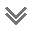

In [8]:
#printing alllinks with 'a'
alllinks=All_a
links=[]
for link in alllinks:
    links.append(link)
print(links)

In [9]:
#######Printing only hyperlinks
pureLinks=[]
allLinks=soup.findAll('a')
for link in allLinks:
    newLink=link.get('href')
    pureLinks.append(newLink)
print(pureLinks)    

['/', '/coronavirus/', '/population/', '/coronavirus/weekly-trends/', '/coronavirus/worldwide-graphs/', '#countries', '#news', '#countries', 'javascript: void(0);', 'javascript: void(0);', 'javascript: void(0);', 'javascript: void(0);', '#coronavirus-cases-daily', '#coronavirus-cases-linear', '#coronavirus-cases-log', '#coronavirus-deaths-daily', '#coronavirus-deaths-linear', '#coronavirus-deaths-log', '/coronavirus/worldwide-graphs/', 'https://unstats.un.org/unsd/methodology/m49/', '#news', '/coronavirus/about/', '/report_us/', '#main_table', '/coronavirus/weekly-trends/#weekly_table', '#nav-today', '#nav-yesterday', '#nav-yesterday2', '#c-all"', '#c-europe"', '#c-north-america"', '#c-asia"', '#c-south-america"', '#c-africa"', '#c-oceania"', 'country/us/', '/world-population/us-population/', 'country/india/', '/world-population/india-population/', 'country/france/', '/world-population/france-population/', 'country/germany/', '/world-population/germany-population/', 'country/brazil/', 

In [10]:
############Section4

In [11]:
tableFile=soup.find('table')

In [12]:
table_rows=tableFile.findAll('tr')
table=[]
for row in table_rows:
    row_list=[]
    row_td=row.findAll('td')
    for cell in row_td:
        stringCell=str(cell)
        originalCell=bs(stringCell,'lxml').get_text()
        cleanedCell=re.sub('\n','',originalCell)
        row_list.append(cleanedCell)
    if len(row_list)>0:
        row_data={'Country':row_list[1], 'Total Cases':row_list[2],
                 'New Cases':row_list[3], 'Total Deaths':row_list[4],
                 'New Deaths':row_list[5],'Total Recovered':row_list[6],
                 'New Recovered':row_list[7],'Active Cases':row_list[8],
                 'Serious Critical':row_list[9], 'Tot Cases/1M pop':row_list[10],
                 'Deaths/1M pop':row_list[11],'Total Tests':row_list[12],
                 'Tests/1M pop':row_list[13],'Population':row_list[14]}
        table.append(row_data)    

In [13]:
Mydata=pd.DataFrame(table)
Mydata

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,North America,"121,262,105","+5,992","1,578,160",+28,"116,064,993","+5,959","3,618,952","9,463",,,,,
1,Asia,"206,597,080","+324,878","1,511,164",+642,"193,360,457","+100,918","11,725,459","11,331",,,,,
2,Europe,"242,719,800","+15,247","1,980,119",+110,"236,784,979","+66,776","3,954,702","7,569",,,,,
3,South America,"66,764,128","+9,270","1,341,457",+52,"64,253,133","+23,085","1,169,538","10,342",,,,,
4,Oceania,"13,582,848","+2,758","23,298",+24,"13,232,703",+20,"326,847",161,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Total:,"66,764,128","+9,270","1,341,457",+52,"64,253,133","+23,085","1,169,538","10,342",,,,,
242,Total:,"13,582,848","+2,758","23,298",+24,"13,232,703",+20,"326,847",161,,,,,
243,Total:,"12,739,944",+222,"258,339",,"12,037,841",,"443,764",843,,,,,
244,Total:,721,,15,,706,,0,0,,,,,


In [14]:
Mydata.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,North America,"121,262,105","+5,992","1,578,160",+28,"116,064,993","+5,959","3,618,952","9,463",,,,,
1,Asia,"206,597,080","+324,878","1,511,164",+642,"193,360,457","+100,918","11,725,459","11,331",,,,,
2,Europe,"242,719,800","+15,247","1,980,119",+110,"236,784,979","+66,776","3,954,702","7,569",,,,,
3,South America,"66,764,128","+9,270","1,341,457",+52,"64,253,133","+23,085","1,169,538","10,342",,,,,
4,Oceania,"13,582,848","+2,758","23,298",+24,"13,232,703",+20,"326,847",161,,,,,
5,Africa,"12,739,944",+222,"258,339",,"12,037,841",+427,"443,764",843,,,,,
6,,721,,15,,706,,0,0,,,,,
7,World,"663,666,626","+358,367","6,692,552",+856,"635,734,812","+197,185","21,239,262","39,709","85,142",858.6,,,
8,USA,"102,407,740",,"1,117,194",,"99,367,089",,"1,923,457","4,280","305,873","3,337","1,151,491,932","3,439,289","334,805,269"
9,India,"44,678,937",,"530,698",,"44,143,665",,"4,574",698,"31,763",377,"909,993,187","646,931","1,406,631,776"


In [15]:
Mydata.tail(15)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
231,Wallis and Futuna,761,,7,,438,,316,,"69,295",637,"20,508","1,867,419","10,982"
232,Diamond Princess,712,,13,,699,,0,,,,,,
233,Niue,458,+21,,,290,+20,168,,"282,367",,,,"1,622"
234,Vatican City,29,,,,29,,0,,"36,295",,,,799
235,Western Sahara,10,,1,,9,,0,,16,2,,,"626,161"
236,MS Zaandam,9,,2,,7,,0,,,,,,
237,China,"417,615","+5,102","5,246",+1,"357,097","+1,920","55,272","1,611",288,4,"160,000,000","110,461","1,448,471,400"
238,Total:,"121,262,105","+5,992","1,578,160",+28,"116,064,993","+5,959","3,618,952","9,463",,,,,
239,Total:,"206,597,080","+324,878","1,511,164",+642,"193,360,457","+100,918","11,725,459","11,331",,,,,
240,Total:,"242,719,800","+15,247","1,980,119",+110,"236,784,979","+66,776","3,954,702","7,569",,,,,


In [16]:
######Excluding the first 7 rows and last 10 rows
Mydata2=Mydata.iloc[7:237]
Mydata2

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
7,World,"663,666,626","+358,367","6,692,552",+856,"635,734,812","+197,185","21,239,262","39,709","85,142",858.6,,,
8,USA,"102,407,740",,"1,117,194",,"99,367,089",,"1,923,457","4,280","305,873","3,337","1,151,491,932","3,439,289","334,805,269"
9,India,"44,678,937",,"530,698",,"44,143,665",,"4,574",698,"31,763",377,"909,993,187","646,931","1,406,631,776"
10,France,"39,245,937",,"161,715",,"38,169,715",,"914,507",869,"598,402","2,466","271,490,188","4,139,547","65,584,518"
11,Germany,"37,313,240",,"161,133",,"36,574,400","+32,300","577,707","1,406","444,822","1,921","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Diamond Princess,712,,13,,699,,0,,,,,,
233,Niue,458,+21,,,290,+20,168,,"282,367",,,,"1,622"
234,Vatican City,29,,,,29,,0,,"36,295",,,,799
235,Western Sahara,10,,1,,9,,0,,16,2,,,"626,161"


In [17]:
Mydata2.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')

In [18]:
Mydata2.to_excel('Covid.xlsx', index=False)

In [19]:
###Defining my own missing list
missing_list=["nA", "na", "--", " ", "NAN", "None","NaN", "NA"]

In [20]:
Mydata3=pd.read_excel('Covid.xlsx',na_values=missing_list)
Mydata3

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,World,"663,666,626","+358,367","6,692,552",856.0,"635,734,812","+197,185","21,239,262","39,709","85,142",858.6,NaN,NaN,NaN
1,USA,"102,407,740",NaN,"1,117,194",NaN,"99,367,089",NaN,"1,923,457","4,280","305,873","3,337","1,151,491,932","3,439,289","334,805,269"
2,India,"44,678,937",NaN,"530,698",NaN,"44,143,665",NaN,"4,574",698,"31,763",377,"909,993,187","646,931","1,406,631,776"
3,France,"39,245,937",NaN,"161,715",NaN,"38,169,715",NaN,"914,507",869,"598,402","2,466","271,490,188","4,139,547","65,584,518"
4,Germany,"37,313,240",NaN,"161,133",NaN,"36,574,400","+32,300","577,707","1,406","444,822","1,921","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
226,Niue,458,+21,NaN,NaN,290,+20,168,NaN,"282,367",NaN,NaN,NaN,"1,622"
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",NaN,NaN,NaN,799
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,2,NaN,NaN,"626,161"


In [21]:
######Droping rows that have missing values in all columns ExCEPT FOR 'New Cases','New Deaths','New Recovered'and 'Serious Critical'
#####Since these columns have many missing values
Mydata3.dropna(subset=['Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'], inplace=True)

In [22]:
Mydata3

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
1,USA,"102,407,740",NaN,"1,117,194",NaN,"99,367,089",NaN,"1,923,457","4,280","305,873","3,337","1,151,491,932","3,439,289","334,805,269"
2,India,"44,678,937",NaN,"530,698",NaN,"44,143,665",NaN,"4,574",698,"31,763",377,"909,993,187","646,931","1,406,631,776"
3,France,"39,245,937",NaN,"161,715",NaN,"38,169,715",NaN,"914,507",869,"598,402","2,466","271,490,188","4,139,547","65,584,518"
4,Germany,"37,313,240",NaN,"161,133",NaN,"36,574,400","+32,300","577,707","1,406","444,822","1,921","122,332,384","1,458,359","83,883,596"
5,Brazil,"36,275,146",NaN,"693,604",NaN,"34,891,300",NaN,"690,242","8,318","168,445","3,221","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Anguilla,"3,904",NaN,12,NaN,"3,879",NaN,13,4,"256,336",788,"51,382","3,373,736","15,230"
218,Saint Pierre Miquelon,"3,349",NaN,2,NaN,"2,449",NaN,898,1,"581,525",347,"25,400","4,410,488","5,759"
222,Macao,"1,774",NaN,11,NaN,854,NaN,909,NaN,"2,658",16,"7,850","11,760","667,490"
223,Montserrat,"1,403",NaN,8,NaN,"1,376",NaN,19,NaN,"282,578","1,611","17,762","3,577,442","4,965"


In [23]:
Mydata3.to_excel('Covid19_final.xlsx', index=False)